In [71]:
import pandas as pd
import numpy as np
import os
import PyPDF2 as ppd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [74]:
stop_words = set(stopwords.words("english"))

In [304]:
#pip install jupyter_to_medium
#import jupyter_to_medium

In [ ]:
##Check length of docs
## Why is TFIDF the best
## what more can be done


In [86]:
def remove_stopwords(doc):
    word_tokens = word_tokenize(doc)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]    
    filtered_sentence = [] 
    for w in word_tokens:
        if w not in stop_words:  
            filtered_sentence.append(w) 
    return ' '.join(filtered_sentence)


def stemmer(doc):
    words = word_tokenize(doc)
    stemmed_words = []
    for word in words:
        stemmed_words.append(ps.stem(word))
    return ' '.join(stemmed_words)
    
ps = PorterStemmer()

In [96]:
path = "C:\\Users\\apathak\\Documents\\Additional\\Stuff\\corona\\"
path1 = "E:\\CoronaVirusPapers\\"

In [129]:
file_names = []
for file in os.listdir(path1): 
    if file.endswith(".pdf"):
        file_names.append(file)
        
docs = []
for file_name in file_names:
    file = open(path1 + file_name, 'rb')
    try:
        file_reader = ppd.PdfFileReader(file)
    except:
        print(str("file_read_error") + "-" + str(file_name))
        pass
    try:
        num_pages = file_reader.numPages
    except:
        print(str("num_page_error") + "-" + str(file_name))
        pass
    pdf_pages =  []
    for i in range(num_pages):
        try: 
            pdf_pages.append(file_reader.getPage(i).extractText())
        except:
            pass
    doc = ' '.join(pdf_pages)
    docs.append(doc)
    file.close()

num_page_error-1987 A Specific Transmembrane Domain of a Coronavirus E1 Glycoprotein Is Required for Its Retention in the Golgi Region.pdf
num_page_error-1987 RNA Recombination of Coronaviruses_ Localization of Neutralizing Epitopes and Neuropathogenic Determinants on the C.pdf
num_page_error-1987 Sorting of Progeny Coronavirus from Condensed Secretory Proteins at the Exit from the Trans-Golgi Network of AtT20.pdf
num_page_error-1993 A Translation-Attenuating Intraleader Open Reading Frame is Selected on Coronavirus mRNAs During Persistent Infecti.pdf
num_page_error-1995 Envelope Glycoprotein Interactions in Coronavirus Assembly.pdf
file_read_error-2003 SARS Virus_ The Beginning of the Unraveling of a New Coronavirus.pdf
file_read_error-2004 Early Detection of Antibodies against Various Structural Proteins of the SARS-Associated Coronavirus in SARS Patien.pdf


num_page_error-2005 Association Between a Novel Human Coronavirus and Kawasaki Disease.pdf
num_page_error-2012 Diarylheptanoids from Alnus japonica Inhibit Papain-Like Protease of Severe Acute Respiratory Syndrome Coronavirus.pdf
file_read_error-2013 CDC Updates Guidance to Detect Novel Coronavirus Infections.pdf
file_read_error-2013 Deadly MERS Coronavirus Not Yet a Global Concern.pdf
num_page_error-2013 Epidemic of Equine Coronavirus at Obihiro Racecourse, Hokkaido, Japan in 2012.pdf
num_page_error-2014 Group B Betacoronavirus in Rhinolophid Bats, Japan.pdf
num_page_error-2014 Ribavirin and interferon (IFN)-alpha-2b as primary and preventive treatment for Middle East respiratory syndrome co.pdf
num_page_error-2016 A recombinant nucleocapsid protein-based indirect enzyme-linked immunosorbent assay to detect antibodies against po.pdf
num_page_error-2016 An Analysis of Actual Conditions with the Infectious Disease of Middle East Respiratory Syndrome Coronavirus (MERS-.pdf
num_page_error

In [156]:
print(len(file_names))
print(len(data))
print(len(year_from_fname))

5329
5329
5329


In [154]:
data = docs
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
data = [re.sub('\s+', ' ', sent) for sent in data]
data = [re.sub("\'", "", sent) for sent in data]

AttributeError: 'list' object has no attribute 'shape'

In [159]:
year_from_fname = [f[:4] for f in file_names]
docs_len = [len(doc) for doc in data]
df_from_fname = pd.DataFrame(file_names)
df_from_fname.columns = ['file_names']
df_from_fname['year'] = year_from_fname
df_from_fname['doc_len'] = docs_len

In [187]:
d2 = df_from_fname.groupby(['year']).agg(
    'doc_len':'sum',
    'file_names':'count'
            }).reset_index()

d2['length_per_doc'] = d2['doc_len']/d2['file_names']

Text(0, 0.5, '# research papers')

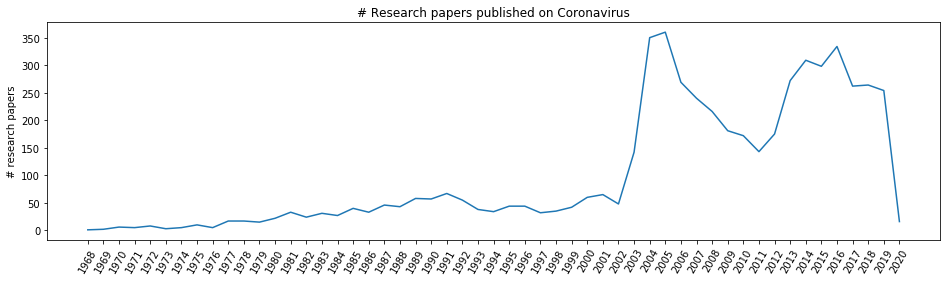

In [186]:
d1 = df_from_fname.groupby(['year'])['file_names'].count().reset_index()
plt.figure(figsize= (16,4))
plt.xticks(rotation = 60, color= 'black')
sns.lineplot('year', 'file_names', data = d1)
plt.title('# Research papers published on Coronavirus')
plt.xlabel('')
plt.ylabel('# research papers')

In [244]:
data_agg = []
data_a= []

for i,doc in enumerate(data):
    if i ==0:
        data_a.append(doc)
    elif year_from_fname[i] == year_from_fname[i-1]:
        if i == len(data)-1:
            data_a.append(doc)
            data_agg.append(' '.join(data_a))
        else: 
            data_a.append(doc)
    else:
        data_agg.append(' '.join(data_a))
        data_a = []
        data_a.append(doc)

In [245]:
print(len(data_agg))
print([len(d) for d in data_agg])

53
[6341, 31273, 133201, 49466, 148690, 108045, 134368, 93121, 100656, 359239, 249463, 378267, 362980, 723468, 636762, 748085, 601046, 793267, 653448, 1150636, 1167084, 1420117, 1519697, 1685697, 1539244, 749434, 768260, 613105, 646244, 638246, 623058, 868762, 2024329, 2019649, 1331320, 3398347, 9060178, 12642149, 9420869, 8656461, 8570076, 6535387, 6330258, 5686209, 5750168, 6770496, 9956629, 8955740, 8947124, 8110026, 8730859, 9199427, 486111]


In [292]:
#print(stopwords.words('english'))

In [250]:
corpus = data_agg
vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,1), max_df = .6, min_df = .01)
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df.head()

0000  00000  000000  0000000  00000000  000000000  0000000000000046  \
0   0.0    0.0     0.0      0.0       0.0        0.0               0.0   
1   0.0    0.0     0.0      0.0       0.0        0.0               0.0   
2   0.0    0.0     0.0      0.0       0.0        0.0               0.0   
3   0.0    0.0     0.0      0.0       0.0        0.0               0.0   
4   0.0    0.0     0.0      0.0       0.0        0.0               0.0   

   0000000000000047  0000000000000082  0000000000000089  ...  \
0               0.0               0.0               0.0  ...   
1               0.0               0.0               0.0  ...   
2               0.0               0.0               0.0  ...   
3               0.0               0.0               0.0  ...   
4               0.0               0.0               0.0  ...   

   ﬂﬁmyhospitalappliesthebest  ﬂﬁpresumednegative  ﬂﬁpresumedpositive  ﬂﬁprob  \
0                         0.0                 0.0                 0.0     0.0   
1                         0.0                 0.0                 0.0     0.0   
2                         0.0                 0.0                 0.0     0.0   
3                         0.0                 0.0                 0.0     0.0   
4                         0.0                 0.0                 0.0     0.0   

   ﬂﬁps6  ﬂﬁtransmissibleenteritis  ﬂﬁuncontrolled   ﬂﬂ  ﬂﬂÿ  ﬂﬂﬂ  
0    0.0                       0.0             0.0  0.0  0.0  0.0  
1    0.0                       0.0             0.0  0.0  0.0  0.0  
2    0.0                       0.0             0.0  0.0  0.0  0.0  
3    0.0                       0.0             0.0  0.0  0.0  0.0  
4    0.0                       0.0             0.0  0.0  0.0  0.0  

[5 rows x 2630895 columns]

In [285]:
unique_year_from_fname = list(set(year_from_fname))
a = [int(year) for year in unique_year_from_fname]
a.sort()

data = df.transpose()
data.columns = a

In [286]:
data.head()

1968  1969  1970  1971  1972  1973  1974  1975  1976  1977  ...  \
0000       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
00000      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
000000     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
0000000    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
00000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

              2011      2012      2013      2014      2015      2016  \
0000      0.000198  0.001398  0.000372  0.000373  0.002819  0.004091   
00000     0.000000  0.000000  0.000391  0.000236  0.000000  0.000000   
000000    0.000000  0.000000  0.000476  0.000143  0.000000  0.001045   
0000000   0.000000  0.000000  0.000000  0.000143  0.000000  0.000000   
00000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

              2017      2018      2019  2020  
0000      0.004361  0.002612  0.007736   0.0  
00000     0.000000  0.000000  0.001817   0.0  
000000    0.000000  0.000000  0.000315   0.0  
0000000   0.000000  0.000000  0.000000   0.0  
00000000  0.000000  0.000000  0.000000   0.0  

[5 rows x 53 columns]

In [287]:
# Find the top 30 words said by each Research paper
top_dict = {}
for c in range(4):
    top = data.iloc[:,c].sort_values(ascending=False).head(30)
    top_dict[data.columns[c]]= list(zip(top.index, top.values))
# Print the top 15 words said by each Research paper
for president, top_words in top_dict.items():
    print(president)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

1968
histone, histones, allfrey, icnv, thc, mp, pea, metabolically, methylated, fambrough, charactcristia, secdlings, unsusceptibility, chargc
---
1969
hdcs, bristol, l132, wi38, tcds0, jstor, utcall, evs, bss, sep, washings, b814, isolations, eytopathic
---
1970
rcv, aib, b814, 0c43, crude, rkcc, oc38, hetoc, rhmk, polyvalent, jstor, bsc, precipitin, mhva
---
1971
i967, 88425by, insead, seroconversions, ferritin, useron, aje, mclntosh, tubular, tagging, https, 2018, oup, cisternae
---


In [295]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000

def plot_wordcloud(year):
    wordcloud = WordCloud(font_path = None, background_color="white", width=3000, height=2000, max_words=500).generate_from_frequencies(data[year])
    # set the word color to black
    wordcloud.recolor(color_func = black_color_func)
    # set the figsize
    plt.figure(figsize=[15,10])
    # plot the wordcloud
    plt.imshow(wordcloud, interpolation="bilinear")
    # remove plot axes
    plt.axis("off")
    # save the image
    plt.savefig(path +"wc_images\\" + str(year) + '_wc.png')

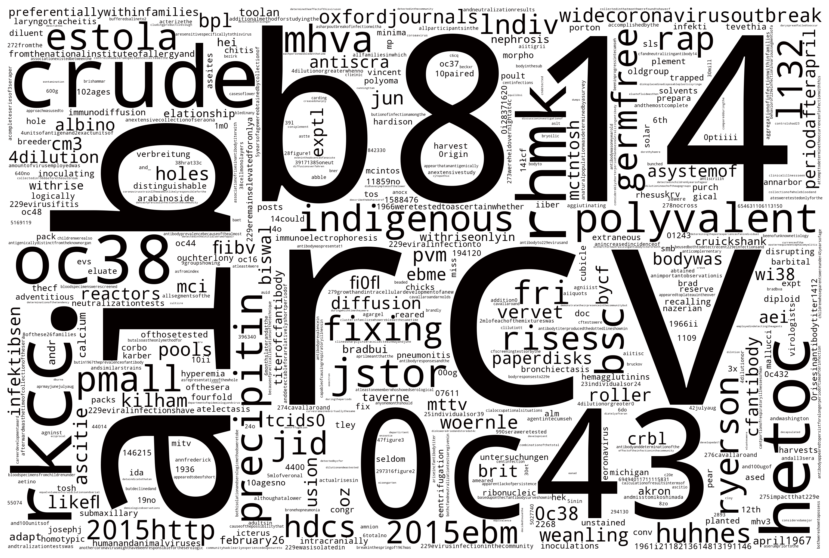

In [297]:
plot_wordcloud(year = 1970)

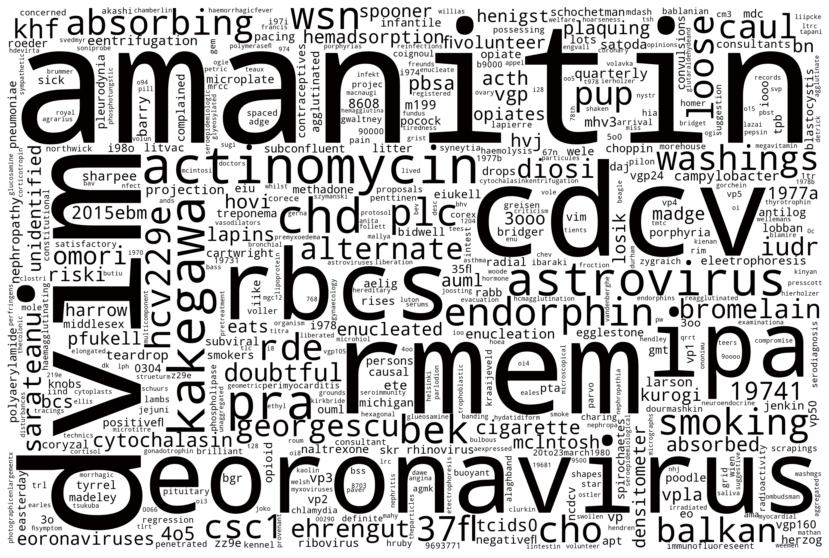

In [298]:
plot_wordcloud(year = 1980)

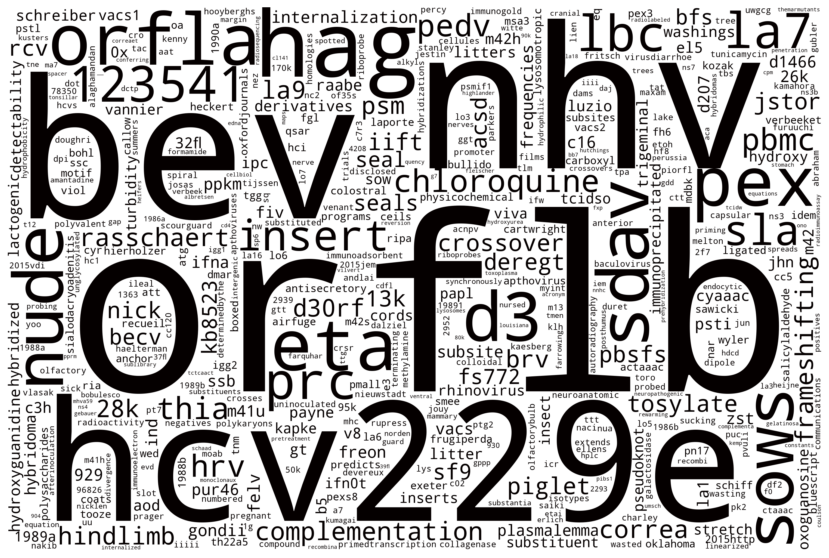

In [299]:
plot_wordcloud(year = 1990)

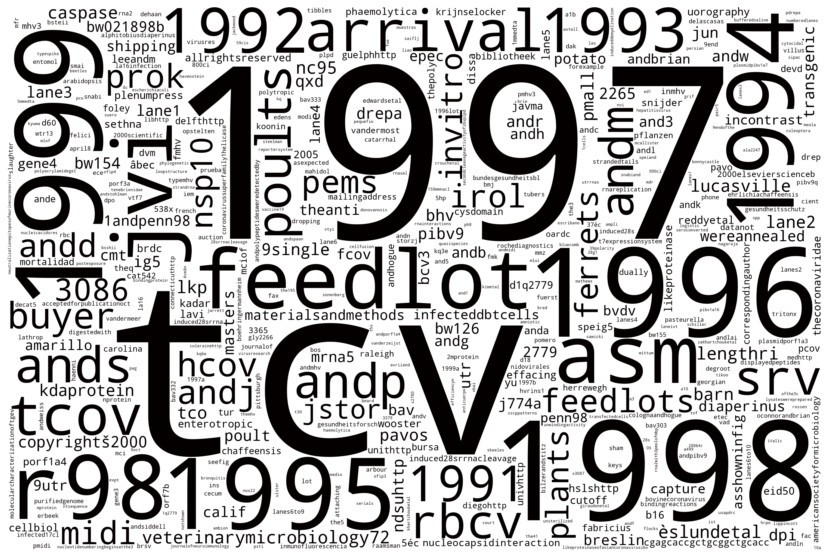

In [300]:
plot_wordcloud(year = 2000)

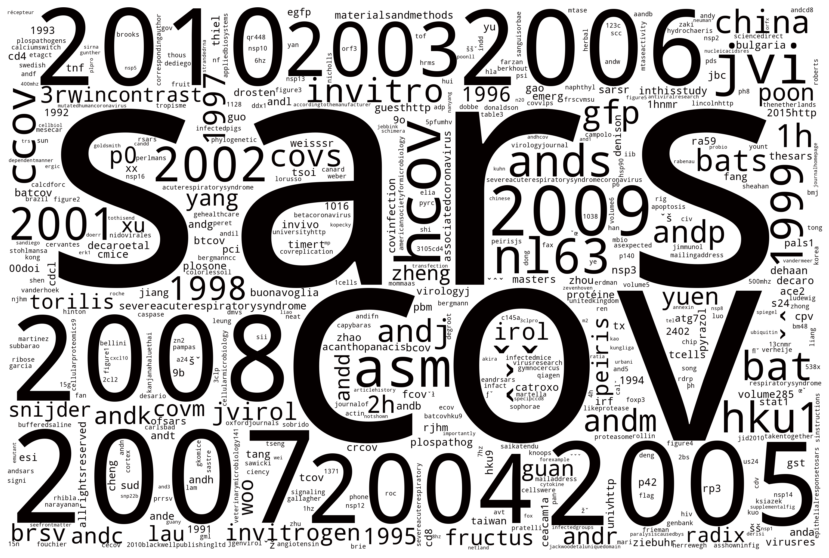

In [301]:
plot_wordcloud(year = 2010)

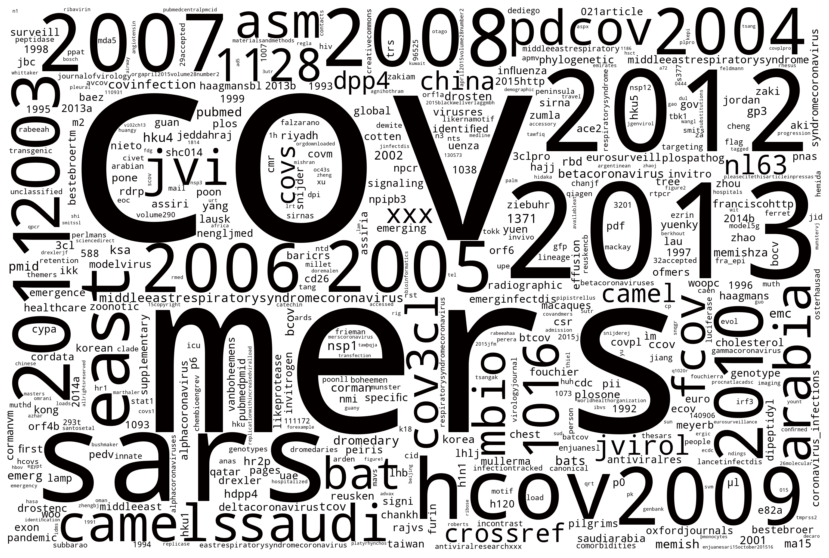

In [302]:
plot_wordcloud(year = 2015)

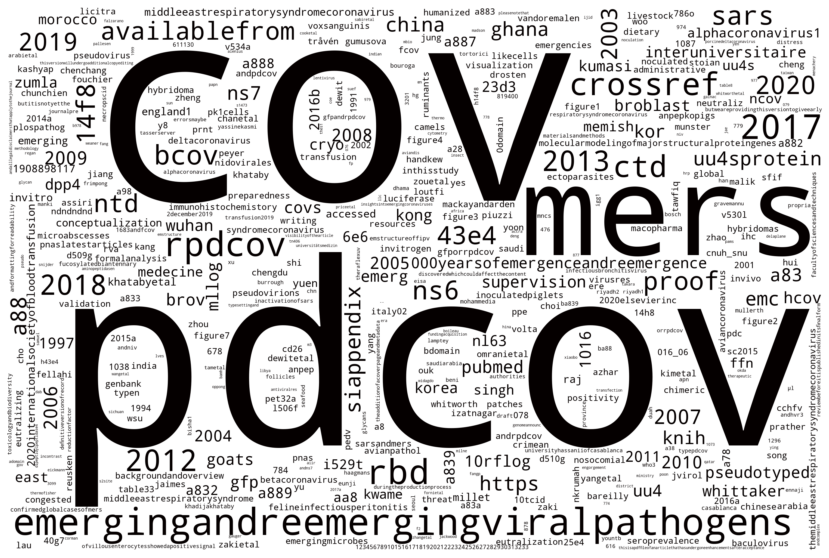

In [296]:
plot_wordcloud(year = 2020)